# Plotting in python: Line plots from data (Sea Level)

By now you should be somewhat comfortable making plots with python/matplotlib.  Let's now look at more plotting options and reading in actual data, combining all that we've learned so far.

In this case, we will repeat our exercises with tide gauge data (done previously with matlab).

First, let's read in a tide gauge record from the UH Sea Level Center (http://uhslc.soest.hawaii.edu).  If you follow the links to data --> legacy portal, then find a record of interest.  Here we choose station 57, Honolulu.  If you right click on the link in the column "CSV data" and "hourly" (should be second set of links in the Honolulu row), then "save link as", you get the URL http://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h057.csv.  We can read this directly with pandas.

In [3]:
import pandas as pd
tide_hnl = pd.read_csv("http://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h057.csv", header=None)

Note that these data sets have no header telling us what the column headings are, so we use "header = None".  We can print out top/bottom of the data:

In [4]:
tide_hnl

,0,1,2,3,4
0,1905,1,1,10,1554
1,1905,1,1,11,1585
2,1905,1,1,12,1585
3,1905,1,1,13,1524
4,1905,1,1,14,1433
...,...,...,...,...,...
1016097,2020,11,30,19,1503
1016098,2020,11,30,20,1424
1016099,2020,11,30,21,1385
1016100,2020,11,30,22,1391


These are now loaded into a pandas DataFrame called "tide_hnl".  The column headings are simple numbers since we had no header.  Next, we pull out the column titled "4" as sea level (in mm). We also want the first column, or the index, to be time.  Since this is hourly data from Jan 2, 1905, we can set this quite easily.

In [5]:
sealevel_hnl = tide_hnl[4]
date = pd.to_datetime(tide_hnl.index*3600.0, origin = '01-02-1905', unit='s')

And now a quick plot:

In [6]:
import matplotlib.pyplot as plt
plt.plot(date,sealevel_hnl)

Like before, we have some missing values to deal with.  In this case they are set to -32767.  We don't really need to know the exact number and can instead replace all negative values with NaN's.

In [7]:
import numpy as np
sealevel_hnl[sealevel_hnl < 0] = np.nan

Note here we needed to import numpy to get access to NaN's.  Now let's replot

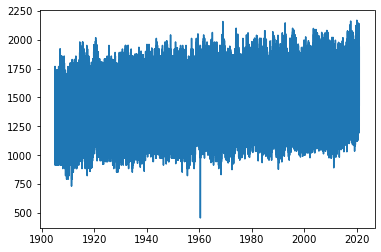

In [8]:
plt.plot(date,sealevel_hnl)

Now we can try compute the linear trend and plot that.

Text(1905-01-01, 750, 'trend = 1.53 cm/decade')

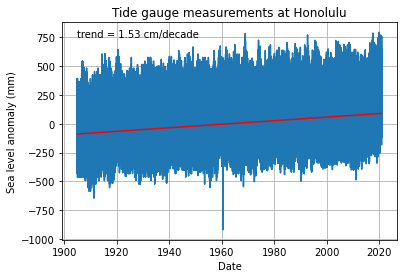

In [9]:
import datetime as dt
t = tide_hnl.index.to_numpy()
anom_sealevel_hnl = sealevel_hnl - np.nanmean(np.where(tide_hnl[4]>=0,tide_hnl[4],np.nan))
anom_sealevel_hnl.fillna(0,inplace=True)

B = np.polyfit(t,anom_sealevel_hnl,1)
# convert trend in mm/hour to cm/decade
trend = B[0] / 10.0 * 24.0 * 365.25 * 10.0
# cheap way to round to two digits
trend = int(trend*100.0)/100.0
Y = np.polyval(B,t)
plt.plot(date,anom_sealevel_hnl)
plt.plot(date,Y,'r')

plt.xlabel('Date')
plt.ylabel('Sea level anomaly (mm)')
plt.title("Tide gauge measurements at Honolulu")
plt.grid()
plt.text(dt.date(1905, 1, 1), 750, "trend = " + str(trend) + ' cm/decade')

As our second example, let’s try download data from a couple Pacific tide gauges to look at tsunami propagation.  The largest earthquake (magnitude 9.5) of the 20th century occurred on May 22, 1960 off the coast of South Central Chile. It generated one of the most destructive tsunamis in the Pacific. Near the generating area, both the earthquake and tsunami were extremely destructive, particularly in the area from Concepcion to Isla Chiloe. Huge tsunami waves measuring as high as 25 m arrived within 10 to 15 minutes after the earthquake, killing at least 200 people. It then took the tsunami about 15 hours to travel the 10,000 miles to Hawaii. 

Let's see how long it took to get to Midway (about 2130 kilometers). Since it's a fast-moving wave (relatively), we'll need hourly data. The data are available from the UH Sea Level Center (UHSLC).  We've already looked at Honolulu (station number 057), and the Midway gauge is station 050.

We will read in both data sets and search for the dates of the tsunami, roughly May 22nd to the 27th.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# read Honolulu data
tide_hnl = pd.read_csv("http://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h057.csv", header=None)
anom_sealevel_hnl = tide_hnl[4] - np.nanmean(np.where(tide_hnl[4]>=0,tide_hnl[4],np.nan))
anom_sealevel_hnl.fillna(0,inplace=True)
date_hnl = pd.to_datetime(tide_hnl.index*3600.0, origin = '01-02-1905', unit='s')

# read Midway data
tide_mdw = pd.read_csv("http://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h050.csv", header=None)
anom_sealevel_mdw = tide_mdw[4] - np.nanmean(np.where(tide_mdw[4]>=0,tide_mdw[4],np.nan))
anom_sealevel_mdw.fillna(0,inplace=True)
date_mdw = pd.to_datetime(tide_mdw.index*3600.0, origin = '02-09-1947', unit='s')

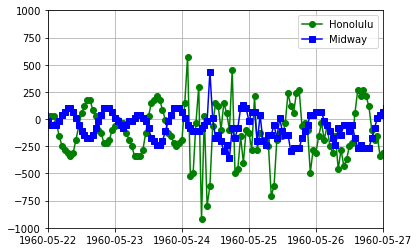

In [11]:
# make plot over concurrent time
plt.plot(date_hnl,anom_sealevel_hnl,'go-',label='Honolulu')
plt.plot(date_mdw,anom_sealevel_mdw,'bs-',label='Midway')
plt.xlim([dt.datetime(1960, 5, 22), dt.datetime(1960, 5, 27)])
plt.ylim(-1000,1000)
plt.grid()
plt.legend()